In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country_data_df=pd.read_csv("Country-data.csv")

In [3]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
# Convert exports,imports and health from % format to number format by calculating off GDPP

# exports - Exports of goods and services. Given as %age of the Total GDP
# imports - Imports of goods and services. Given as %age of the Total GDP
# health - Total health spending as %age of Total GDP

country_data_df['export_amt']=country_data_df['gdpp']/100*country_data_df['exports']
country_data_df['import_amt']=country_data_df['gdpp']/100*country_data_df['imports']
country_data_df['health_amt']=country_data_df['gdpp']/100*country_data_df['health']

In [6]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [7]:
# Drop the original variables - exports,imports & health
country_data_df.drop(['exports','imports','health'],axis=1,inplace=True)

In [8]:
country_data_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


In [9]:
#Checking for country with least income
country_data_df.sort_values('income',ascending=False).head(5)
# Qatar and Luxembourg have highest income levels among all countries


,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.9,16731.4,1272.43
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0,149100.0,8158.50
23,Brunei,10.5,80600,16.700,77.1,1.84,35300,23792.2,9884.0,1002.52
82,Kuwait,10.8,75200,11.200,78.2,2.21,38500,25679.5,11704.0,1012.55
133,Singapore,2.8,72100,-0.046,82.7,1.15,46600,93200.0,81084.0,1845.36


In [10]:
#Checking for country with high child mortality
country_data_df.sort_values('child_mort',ascending=False).head(5)
# Haiti has the highest child mortality rate of 208

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,428.314,45.7442
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,137.655,52.2690
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.096,390.195,40.6341
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,118.190,17.7508
97,Mali,137.0,1870,4.37,59.5,6.55,708,161.424,248.508,35.2584


In [11]:
#Checking for country with high inflation
country_data_df.sort_values('inflation',ascending=False).head(5)

# Nigeria has the highest inflation of 104 followed by Venezuela with 45.9 & Mongolia with 39.2

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
113,Nigeria,130.0,5150,104.0,60.5,5.84,2330,589.49,405.42,118.131
163,Venezuela,17.1,16500,45.9,75.4,2.47,13500,3847.50,2376.00,662.850
103,Mongolia,26.1,7710,39.2,66.2,2.64,2650,1237.55,1502.55,144.160
149,Timor-Leste,62.6,1850,26.5,71.1,6.23,3600,79.20,1000.80,328.320
49,Equatorial Guinea,111.0,33700,24.9,60.9,5.21,17100,14671.80,10071.90,766.080


In [12]:
#Checking for country with high gdpp
country_data_df.sort_values('gdpp',ascending=False).head(5)
# Luxembourg has the highest gdpp

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
91,Luxembourg,2.8,91700,3.620,81.3,1.63,105000,183750.0,149100.0,8158.50
114,Norway,3.2,62300,5.950,81.0,1.95,87800,34856.6,25023.0,8323.44
145,Switzerland,4.5,55500,0.317,82.2,1.52,74600,47744.0,39761.8,8579.00
123,Qatar,9.0,125000,6.980,79.5,2.07,70300,43796.9,16731.4,1272.43
44,Denmark,4.1,44000,3.220,79.5,1.87,58000,29290.0,25288.0,6612.00


In [13]:
country_data_df.describe(percentiles=[.25,.5,.75,.9,.95,.99])
# From the below table, it can be inferred that income values at 99% is getting almost doubled when compared to 95%
# with max value at 125000. Inflation is also getting doubled at 99% w.r.t 95% with an extremely high max value.
# Similarly gdpp and child mortality values have jumped to a significant higher value at 99% when compared to 95%.
# Another important point to note is that median value of the variables, child mortality, income, inflation, gdpp
# and export, import & health amount, is really low when compared to the max values.

,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,6588.352108,1056.733204
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,14710.810418,1801.408906
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,0.651092,12.821200
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
90%,100.220000,41220.000000,16.640000,80.400000,5.322000,41840.000000,17760.600000,15034.280000,3825.416000
95%,116.000000,48290.000000,20.870000,81.400000,5.861000,48610.000000,31385.100000,24241.560000,4966.701000
99%,153.400000,84374.000000,41.478000,82.370000,6.563600,79088.000000,64794.260000,55371.390000,8410.330400


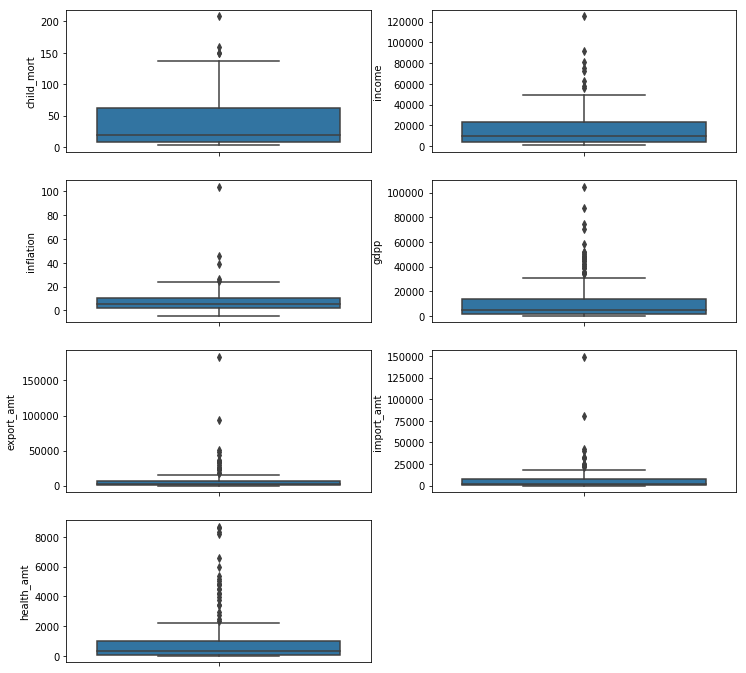

In [14]:
# Boxplot to view the outliers visually
# in variables - child mortality, income, inflation, gdpp and export, import & health amount
plt.figure(figsize=(12, 12))
plt.figure(1)
plt.subplot(421)
sns.boxplot(data=country_data_df,y='child_mort')
plt.subplot(422)
sns.boxplot(data=country_data_df,y='income')
plt.subplot(423)
sns.boxplot(data=country_data_df,y='inflation')
plt.subplot(424)
sns.boxplot(data=country_data_df,y='gdpp')
plt.subplot(425)
sns.boxplot(data=country_data_df,y='export_amt')
plt.subplot(426)
sns.boxplot(data=country_data_df,y='import_amt')
plt.subplot(427)
sns.boxplot(data=country_data_df,y='health_amt')

plt.show()

# We can see the outliers, but we wont be removing it now. Will remove just before we perform clustering

In [15]:
# scale the numeric data using standard scaler
scaler = StandardScaler()
scaled_country=scaler.fit_transform(country_data_df.drop('country',axis=1))
scaled_country.shape

C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aramanan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(167, 9)

In [16]:
scaled_country_df=pd.DataFrame(scaled_country)
scaled_country_df.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.432276,-0.565040
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771


In [17]:
# Run PCA on all numeric variables to reduce the dimensionality
pca=PCA(svd_solver='randomized',random_state=42)
pca.fit(scaled_country_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
# Listing PCA components
pca.components_

array([[-0.31639186,  0.38004113, -0.14308531,  0.34385651, -0.30284224,
         0.39998795,  0.34288671,  0.34486492,  0.358535  ],
       [ 0.47626735,  0.12838448,  0.22126089, -0.36981973,  0.4597152 ,
         0.2006241 ,  0.39731091,  0.37078075,  0.1550529 ],
       [-0.15001225,  0.14576421,  0.94841868,  0.19675173, -0.07783431,
         0.01033941, -0.03057367, -0.07217386, -0.07570322],
       [-0.14805195, -0.15480592, -0.00762798, -0.01839465, -0.21392805,
        -0.36477239,  0.44942527,  0.46179779, -0.59971228],
       [ 0.1019948 ,  0.79407469, -0.13642345, -0.15404105, -0.02033568,
         0.08750149, -0.03853829, -0.2527867 , -0.49319984],
       [ 0.19658519, -0.03814681,  0.10840284, -0.58600986, -0.75390075,
         0.04538167, -0.03891112, -0.01217988,  0.18069888],
       [ 0.76126725, -0.02311312, -0.02207663,  0.58120846, -0.27314534,
        -0.04402264, -0.01366973,  0.02718244, -0.06461567],
       [ 0.00644411,  0.3938113 , -0.00607016,  0.002966  ,  0

In [19]:
# Checking the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

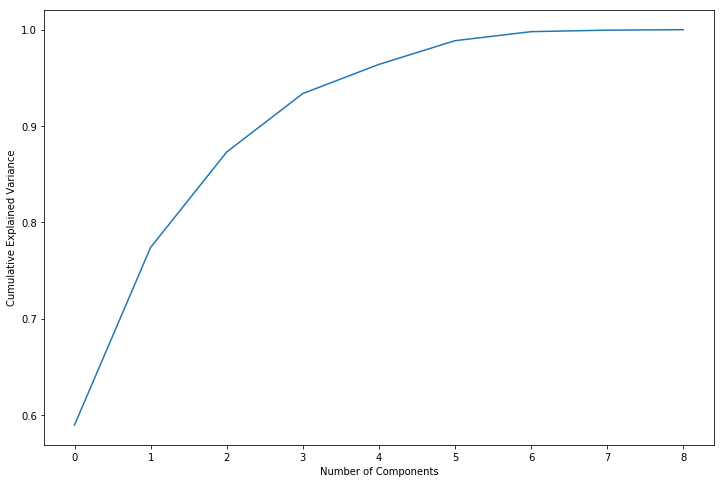

In [20]:
# Draw screeplot to assess number of principal components needed
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Looks like 3 components are enough to describe around 92% of variance in dataset
# Hence we will choose 3 components for our modelling

In [21]:
# Hence the 8 variables are loaded on first three components. 
colnames=list(country_data_df.drop('country',axis=1).columns)
pca_df=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'Feature':colnames})
pca_df

,PC1,PC2,PC3,Feature
0,-0.316392,0.476267,-0.150012,child_mort
1,0.380041,0.128384,0.145764,income
2,-0.143085,0.221261,0.948419,inflation
3,0.343857,-0.369820,0.196752,life_expec
4,-0.302842,0.459715,-0.077834,total_fer
5,0.399988,0.200624,0.010339,gdpp
6,0.342887,0.397311,-0.030574,export_amt
7,0.344865,0.370781,-0.072174,import_amt
8,0.358535,0.155053,-0.075703,health_amt


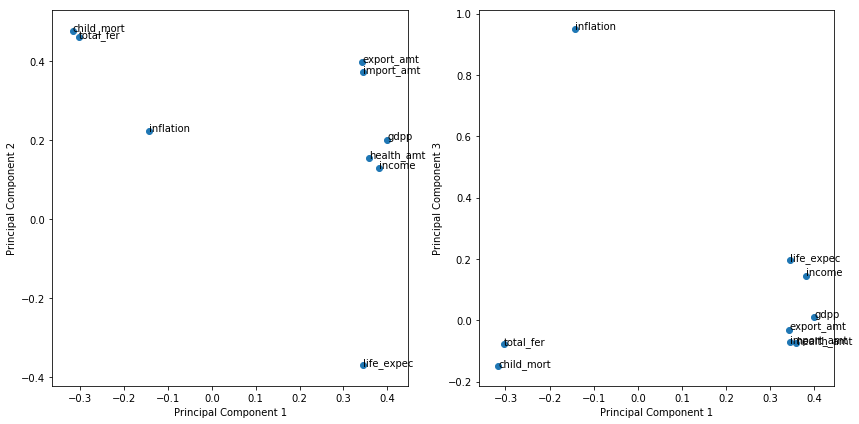

In [22]:
# Draw plot to understand the relationship between original variable and principal component
%matplotlib inline
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i,txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.subplot(122)
plt.scatter(pca_df.PC1,pca_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i,txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC3[i]))
plt.tight_layout()

plt.show()

# PC1 is in the direction where income, exports, imports, health, gdpp & life expectancy is higher
# PC2 is in the direction where child mortality & fertility is higher
# PC3 is in the direction where inflation is higher

In [23]:
# dimenstionality reduction using the three Principal Components 
pca_final = IncrementalPCA(n_components=3)

In [24]:
pca_country_df = pca_final.fit_transform(scaled_country_df)
pca_country_df.shape

(167, 3)

In [25]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(pca_country_df)

In [26]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

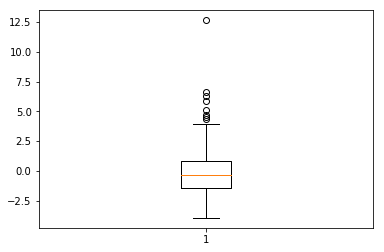

In [27]:
# Performing Outlier Analysis before proceeding to clustering
# We can reassign the outliers to the clusters later
# For PC1
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

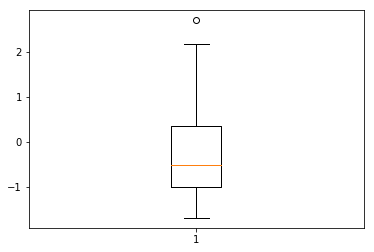

In [28]:
# For PC2
plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

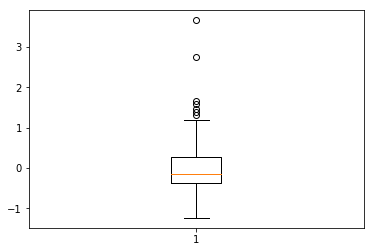

In [29]:
# For PC3
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [30]:
# Checking how many rows have got deleted 
pcs_df2.shape

(119, 3)

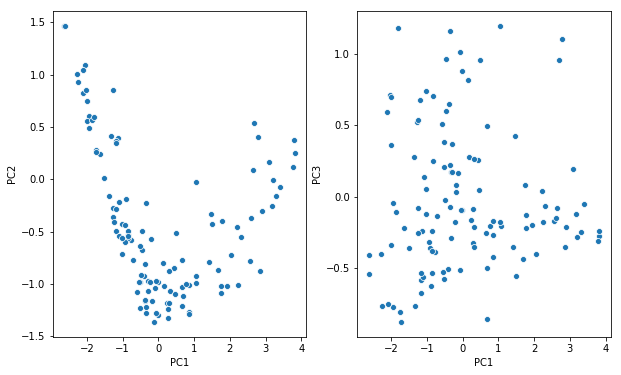

In [31]:
#Visualising the data points on the PCs.
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.subplot(122)
sns.scatterplot(x='PC1',y='PC3',data=pcs_df2)
plt.show()
# Can see three visible clusters in the plot between PC1 and PC2.

In [32]:
# Lets calculate hopkins statistic to see if the data can be clustered or not
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
# Lets see the hopkins score
hopkins(pcs_df2)
# Since the hopkins score of 0.68 is greater than 0.5, the data has tendency to be formed into clusters. 
# hence we can proceed with our clustering

0.7880872876055799

In [34]:
## KMEANS Clustering

In [35]:
# silhouette analysis

for num_clusters in range(2,10):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pcs_df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pcs_df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.46397714562182485
For n_clusters=4, the silhouette score is 0.39873565683671497
For n_clusters=5, the silhouette score is 0.3613889400909614
For n_clusters=6, the silhouette score is 0.3606588168757522
For n_clusters=7, the silhouette score is 0.3756066845114215
For n_clusters=8, the silhouette score is 0.3752370154601887
For n_clusters=9, the silhouette score is 0.37831096852322127


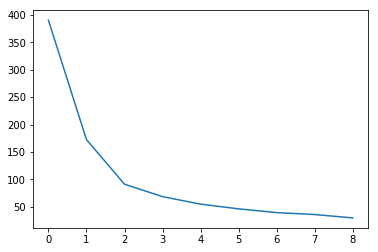

In [36]:
# From the above analysis, we find that 3 seems to be a good number of clusters for K means algorithm with solhouette
# score of 0.46. Even though 2 has a better silhouette score, but it doesnt make sense to group countries 
# only in 2 clusters, hence choosing 3.

# Proceeding to the elbow curve method
ssd = []
for num_clusters in range(1,10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pcs_df2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#Here we are seeing a distinct bend at around 2 and 3 clusters.Again, 3 seems a good K to choose as 2 is too less.

In [37]:
# Lets perform K-Means Clustering with K=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
pcs_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


In [39]:
# Assigning Kmeans cluster ID  to the dataframe
kmeans_df=pcs_df2.copy()
kmeans_df['kmeans_cluster_ID']=kmeans.labels_
kmeans_df.head()

,PC1,PC2,PC3,kmeans_cluster_ID
0,-2.637442,1.469038,-0.541359,1
2,-0.457626,-0.673301,0.961867,0
4,0.649849,-1.024374,-0.250103,0
6,-0.332692,-1.274517,0.176636,0
7,3.180362,-0.250785,-0.116877,2


In [40]:
kmeans_df['kmeans_cluster_ID'].value_counts()
# Below table shows the count of countries by each cluster

0    61
1    31
2    27
Name: kmeans_cluster_ID, dtype: int64

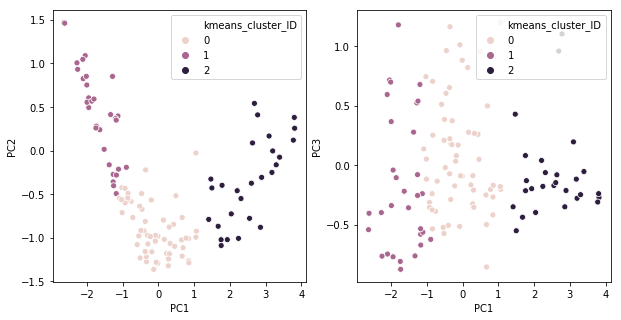

In [41]:
# Drawing scatterplot to visualise the 3 clusters
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(x='PC1',y='PC2',hue='kmeans_cluster_ID',legend='full',data=kmeans_df)
plt.subplot(122)
sns.scatterplot(x='PC1',y='PC3',hue='kmeans_cluster_ID',legend='full',data=kmeans_df)
plt.show()

# The scatterplot shows visually three distinct clusters

In [42]:
# Merging original dataframe with kmeans dataframe based on index of the rows.
kmeans_final_df=pd.merge(kmeans_df,country_data_df, left_index=True,right_index=True)
kmeans_final_df.head()

,PC1,PC2,PC3,kmeans_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,-2.637442,1.469038,-0.541359,1,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
2,-0.457626,-0.673301,0.961867,0,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
4,0.649849,-1.024374,-0.250103,0,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600
6,-0.332692,-1.274517,0.176636,0,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.660,141.6800
7,3.180362,-0.250785,-0.116877,2,Australia,4.8,41400,1.16,82.0,1.93,51900,10276.20,10847.100,4530.8700


In [43]:
# View countries in cluster 0
kmeans_final_df[kmeans_final_df.kmeans_cluster_ID==0]

,PC1,PC2,PC3,kmeans_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
2,-0.457626,-0.673301,0.961867,0,Algeria,27.3,12900,16.100,76.5,2.89,4460,1712.64,1400.440,185.9820
4,0.649849,-1.024374,-0.250103,0,Antigua and Barbuda,10.3,19100,1.440,76.8,2.13,12200,5551.00,7185.800,735.6600
6,-0.332692,-1.274517,0.176636,0,Armenia,18.1,6700,7.770,73.3,1.69,3220,669.76,1458.660,141.6800
9,-0.467515,-0.493492,0.603288,0,Azerbaijan,39.2,16000,13.800,69.1,1.92,5840,3171.12,1208.880,343.3920
12,-1.014199,-0.711808,-0.116989,0,Bangladesh,49.4,2440,7.140,70.4,2.33,758,121.28,165.244,26.6816
13,0.845238,-1.008606,-0.417262,0,Barbados,14.2,15300,0.321,76.7,1.78,16000,6320.00,7792.000,1275.2000
14,-0.013447,-0.982186,0.880913,0,Belarus,5.5,16200,15.100,70.4,1.49,6030,3099.42,3889.350,338.2830
16,-0.402707,-0.921816,-0.504892,0,Belize,18.8,7880,1.140,71.4,2.71,4340,2525.88,2495.500,225.6800
18,-0.714998,-0.768107,-0.134109,0,Bhutan,42.7,6420,5.990,72.1,2.38,2180,926.50,1541.260,113.3600
19,-1.017781,-0.426144,0.051647,0,Bolivia,46.6,5410,8.780,71.6,3.20,1980,815.76,679.140,95.8320


In [44]:
# Drop PCs from the dataframe
kmeans_final_df.drop(['PC1','PC2','PC3'],axis=1,inplace=True)
kmeans_final_df.head()

,kmeans_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,1,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
2,0,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
4,0,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600
6,0,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.660,141.6800
7,2,Australia,4.8,41400,1.16,82.0,1.93,51900,10276.20,10847.100,4530.8700


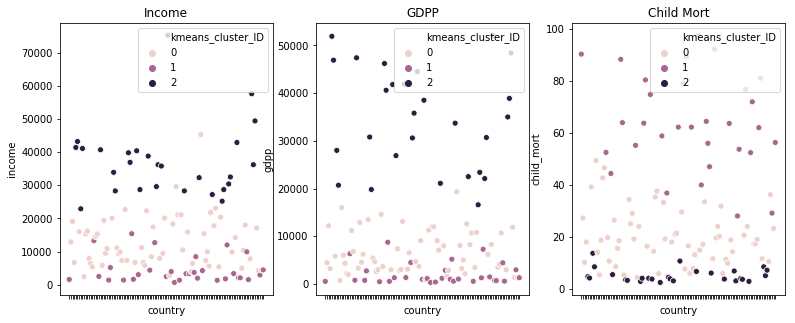

In [45]:
# Draw scatterplot to visualise the countries in the form of clusters by gdpp,income and child mortality 
plt.figure(figsize=(13,5))
plt.subplot(131)
plt.title("Income")
g=sns.scatterplot(x='country',y='income',hue='kmeans_cluster_ID',legend='full',data=kmeans_final_df)
g.set(xticklabels=[])
plt.subplot(132)
plt.title("GDPP")
g=sns.scatterplot(x='country',y='gdpp',hue='kmeans_cluster_ID',legend='full',data=kmeans_final_df)
g.set(xticklabels=[])
plt.subplot(133)
plt.title("Child Mort")
g=sns.scatterplot(x='country',y='child_mort',hue='kmeans_cluster_ID',legend='full',data=kmeans_final_df)
g.set(xticklabels=[])
plt.show()

# The below plot shows that countries within cluster 0 have high child mortality, but low gdpp & incomes. 
# Whereas the countries in cluster 1 have low child mortality with high income & gdpp.
# The countries in cluster 2 are the middle ones.

In [46]:
## Hierarchical Clustering

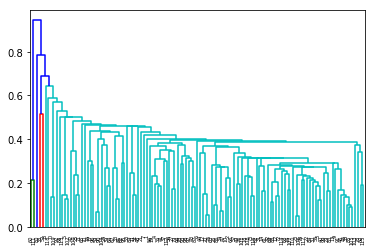

In [47]:
# View Dendrogram using single linkage method
mergings = linkage(pcs_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()
# Can not figure out cluster grouping clearly in single linkage method. Hence we will perform hierarchical clustering
# using complete linkage method below.

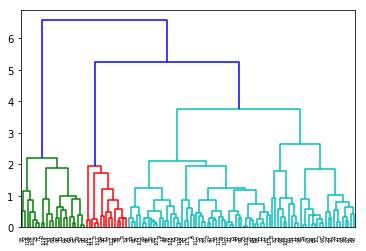

In [48]:
# View Dendrogram using complete linkage method
mergings = linkage(pcs_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# We can see much better clustering using complete linkage method when compared to single linkage method

In [49]:
# Choosing three clusters  
hier_cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
hier_cluster_labels

array([0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 2, 2, 1, 1, 1, 1, 0])

In [50]:
hier_df=pcs_df2.copy()
hier_df['hier_cluster_ID']=hier_cluster_labels

In [51]:
hier_df['hier_cluster_ID'].value_counts()

1    81
0    23
2    15
Name: hier_cluster_ID, dtype: int64

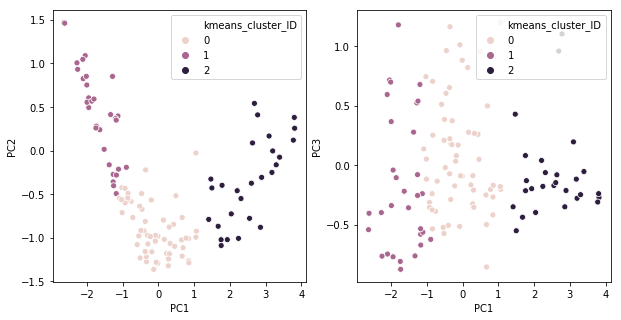

In [52]:
# Drawing scatterplot to visualise the 3 clusters
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(x='PC1',y='PC2',hue='kmeans_cluster_ID',legend='full',data=kmeans_df)
plt.subplot(122)
sns.scatterplot(x='PC1',y='PC3',hue='kmeans_cluster_ID',legend='full',data=kmeans_df)
plt.show()

# The scatterplot shows visually three distinct clusters

In [53]:
# Merging original dataframe with hierarchical dataframe
hier_final_df=pd.merge(hier_df,country_data_df, left_index=True,right_index=True)
hier_final_df.head()

,PC1,PC2,PC3,hier_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,-2.637442,1.469038,-0.541359,0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
2,-0.457626,-0.673301,0.961867,1,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
4,0.649849,-1.024374,-0.250103,1,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600
6,-0.332692,-1.274517,0.176636,1,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.660,141.6800
7,3.180362,-0.250785,-0.116877,2,Australia,4.8,41400,1.16,82.0,1.93,51900,10276.20,10847.100,4530.8700


In [54]:
# Drop PCs from the dataframe
hier_final_df.drop(['PC1','PC2','PC3'],axis=1,inplace=True)
hier_final_df.head()

,hier_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
2,1,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
4,1,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600
6,1,Armenia,18.1,6700,7.77,73.3,1.69,3220,669.76,1458.660,141.6800
7,2,Australia,4.8,41400,1.16,82.0,1.93,51900,10276.20,10847.100,4530.8700


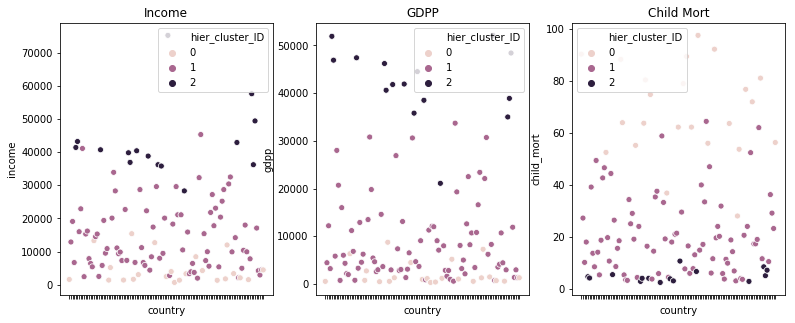

In [55]:
# Draw scatterplot to visualise the countries in the form of clusters by gdpp,income and child mortality 
plt.figure(figsize=(13,5))
plt.subplot(131)
plt.title("Income")
g=sns.scatterplot(x='country',y='income',hue='hier_cluster_ID',legend='full',data=hier_final_df)
g.set(xticklabels=[])
plt.subplot(132)
plt.title("GDPP")
g=sns.scatterplot(x='country',y='gdpp',hue='hier_cluster_ID',legend='full',data=hier_final_df)
g.set(xticklabels=[])
plt.subplot(133)
plt.title("Child Mort")
g=sns.scatterplot(x='country',y='child_mort',hue='hier_cluster_ID',legend='full',data=hier_final_df)
g.set(xticklabels=[])
plt.show()

# The below plot shows that countries within cluster 0 have high child mortality, but low gdpp & incomes. 
# Whereas the countries in cluster 2 have low child mortality with high income & gdpp.
# The countries in cluster 1 are the middle ones.

In [56]:
# View countries in cluster 0
hier_final_df[hier_final_df.hier_cluster_ID==0]

,hier_cluster_ID,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt
0,0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.3000,248.297,41.9174
21,0,Botswana,52.5,13300,8.92,57.1,2.88,6350,2768.6000,3257.550,527.0500
36,0,Comoros,88.2,1410,3.87,65.9,4.75,769,126.8850,397.573,34.6819
38,0,"Congo, Rep.",63.9,5190,20.70,60.4,4.95,2740,2331.7400,1498.780,67.4040
50,0,Eritrea,55.2,1420,11.60,61.7,4.61,482,23.0878,112.306,12.8212
55,0,Gabon,63.7,15400,16.60,62.9,4.08,8750,5048.7500,1653.750,306.2500
56,0,Gambia,80.3,1660,4.30,65.5,5.71,562,133.7560,239.974,31.9778
59,0,Ghana,74.7,3060,16.60,62.2,4.27,1310,386.4500,601.290,68.3820
72,0,Iraq,36.9,12700,16.60,67.2,4.56,4500,1773.0000,1534.500,378.4500
80,0,Kenya,62.2,2480,2.09,62.8,4.37,967,200.1690,324.912,45.9325


In [57]:
# On comparing the plots drawn from the results of kmeans and hierarchical clustering, 
# we can see that in hierarchical clustering, there are many points overlapping between cluster 1 and 2, similarly
# between 0 and 1. 
# The overlapping is far lesser in the clusters produced by kmeans clustering, hence deciding to go forward with
# clusters formed by kmeans

In [58]:
## Analysis of Clusters and adding outliers countries back to the dataframe

In [59]:
# compute mean of gdpp,income and child mortality for each cluster
mn_income = pd.DataFrame(kmeans_final_df.groupby(["kmeans_cluster_ID"]).income.mean())
mn_gdpp = pd.DataFrame(kmeans_final_df.groupby(["kmeans_cluster_ID"]).gdpp.mean())
mn_childmort = pd.DataFrame(kmeans_final_df.groupby(["kmeans_cluster_ID"]).child_mort.mean())


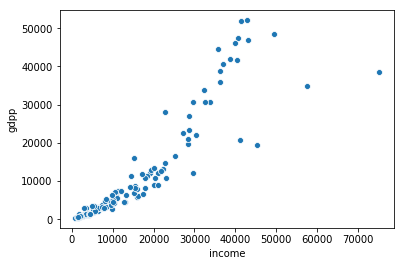

In [60]:
# scatterplot between income and gdpp
sns.scatterplot(x='income',y='gdpp',data=kmeans_final_df)

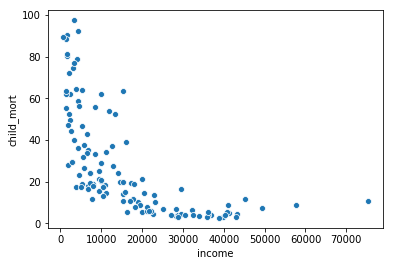

In [61]:
# scatterplot between child mortality and income
sns.scatterplot(x='income',y='child_mort',data=kmeans_final_df)

In [62]:
df = pd.concat([mn_income,mn_gdpp,mn_childmort], axis=1)
df

,income,gdpp,child_mort
kmeans_cluster_ID,,,
0,12796.557377,6636.360656,20.221311
1,4450.000000,2072.161290,63.651613
2,37170.370370,34696.296296,5.322222


In [63]:
# Lets add back the countries which were removed as part of outlier analysis
combined_df=pd.merge(country_data_df,kmeans_final_df['kmeans_cluster_ID'],how='outer',left_index=True,right_index=True)
combined_df.shape

(167, 11)

In [64]:
# Here we need to find atleast 5 countries with lower socio economic development i.e low income, low gdpp, high
# child mortality etc.
# So we can choose the mean of these variables of cluster 0 as the cut off and focus on the countries which are falling
# beneath these levels

In [65]:
kmeans_final_df.shape

(119, 11)

In [66]:
country_data_df.shape

(167, 10)

In [67]:
# So below are the 167-199=32 countries which were removed as part of outlier analysis and dont have any cluster ID 
combined_df[combined_df.kmeans_cluster_ID.isna()].sort_values(by='income',ascending=True)

# Definitely the 11 countries at the bottom have really high income & gdpp and hence were removed as part of outlier analysis
# we can completely ignore these 11 countries

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt,kmeans_cluster_ID
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,137.2740,165.664,26.4194,NaN
26,Burundi,93.6,764,12.300,57.7,6.26,231,20.6052,90.552,26.7960,NaN
112,Niger,123.0,814,2.550,58.8,7.49,348,77.2560,170.868,17.9568,NaN
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.6280,118.190,17.7508,NaN
106,Mozambique,101.0,918,7.640,54.5,5.56,419,131.9850,193.578,21.8299,NaN
94,Malawi,90.5,1030,12.100,53.1,5.31,459,104.6520,160.191,30.2481,NaN
63,Guinea,109.0,1190,16.100,58.0,5.34,648,196.3440,279.936,31.9464,NaN
150,Togo,90.3,1210,1.180,58.7,4.87,488,196.1760,279.624,37.3320,NaN
132,Sierra Leone,160.0,1220,17.200,55.0,5.20,399,67.0320,137.655,52.2690,NaN
64,Guinea-Bissau,114.0,1390,2.970,55.6,5.05,547,81.5030,192.544,46.4950,NaN


In [68]:
# Check which countries have values below the calculated mean value from cluster 0
# Binning
countries=combined_df[combined_df['income']<=4450]
countries=countries[countries['gdpp']<= 2072.161290]
countries=countries[countries['child_mort']>= 63.651613]

In [69]:
countries.shape
# There are 32 countries with income & gdpp lesser than the mean income & mean gdpp of cluster 0, 
# and with higher child mortality than the mean child mortality of cluster 0

(32, 11)

In [70]:
countries.sort_values(by=['child_mort','inflation','life_expec'],ascending=False)
# Haiti has the highest child mortality & least life expectation and also has quite low gdpp
# Congo, Dem. Rep, Sierra Leone,Central African Republic, Niger,Mozambique
# have low incomes and higher child mortality rate as well
# Burundi has the least gdpp of 231 and very low income levels
# Chad and Mali have little higher income levels but really high child mortality rate

# So the final list of countries are the following 32 countries which needs to be focused upon.

# However the 9 countries which needs more immediate focus are - Haiti, Congo, Dem. Rep,
# Sierra Leone,Central African Republic, Niger,Mozambique, Burundi, Chad and Mali

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_amt,import_amt,health_amt,kmeans_cluster_ID
66,Haiti,208.0,1500,5.450,32.1,3.33,662,101.28600,428.314000,45.7442,NaN
132,Sierra Leone,160.0,1220,17.200,55.0,5.20,399,67.03200,137.655000,52.2690,NaN
32,Chad,150.0,1930,6.390,56.5,6.59,897,330.09600,390.195000,40.6341,NaN
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.62800,118.190000,17.7508,NaN
97,Mali,137.0,1870,4.370,59.5,6.55,708,161.42400,248.508000,35.2584,NaN
112,Niger,123.0,814,2.550,58.8,7.49,348,77.25600,170.868000,17.9568,NaN
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,137.27400,165.664000,26.4194,NaN
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.40000,170.200000,38.7550,NaN
64,Guinea-Bissau,114.0,1390,2.970,55.6,5.05,547,81.50300,192.544000,46.4950,NaN
40,Cote d'Ivoire,111.0,2690,5.390,56.3,5.27,1220,617.32000,528.260000,64.6600,NaN
